In [0]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import date
import itertools
import warnings
warnings.filterwarnings("ignore")

# Machine Learning
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols

#Visualization
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

In [0]:
#Loading the dataset into a dataframe
data = pd.read_csv('supermarket_sales.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [0]:
#Grouping the data by sales on each day
data['Date'] = pd.to_datetime(data['Date'])
data['day'] = data['Date'].dt.day 
data1 = data.groupby('Date')['Quantity'].sum().reset_index()
data1.head()

,Date,Quantity
0,2019-01-01,81
1,2019-01-02,48
2,2019-01-03,37
3,2019-01-04,32
4,2019-01-05,55


Text(0, 0.5, 'Quantity')

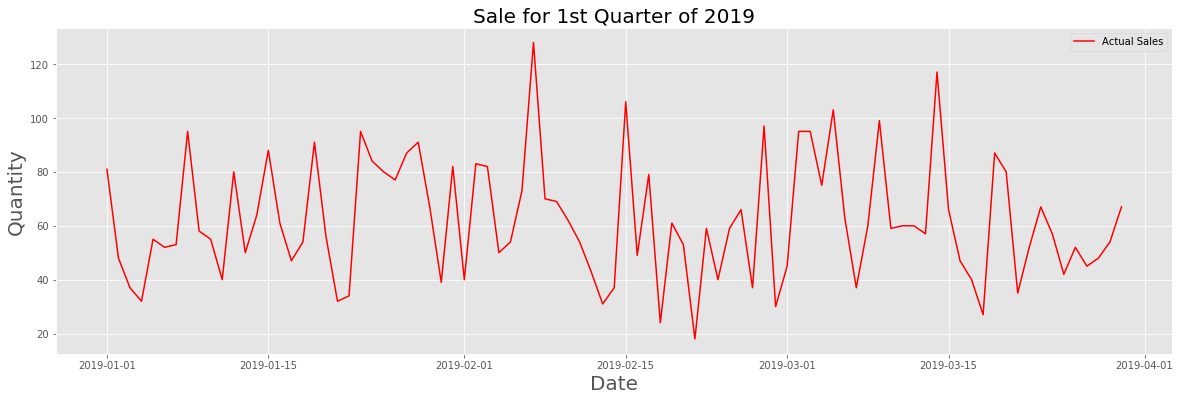

In [0]:
#Plot on the sale of the dataset
plt.figure(figsize=([20,6]))
plt.plot_date(data1['Date'], data1['Quantity'], fmt='r-', xdate=True, ydate=False, label='Actual Sales')
plt.legend(loc='upper right')
plt.title('Sale for 1st Quarter of 2019',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Quantity',fontsize=20)

In [0]:
data1 =data1.set_index('Date')
data1.head()

,Quantity
Date,
2019-01-01,81
2019-01-02,48
2019-01-03,37
2019-01-04,32
2019-01-05,55


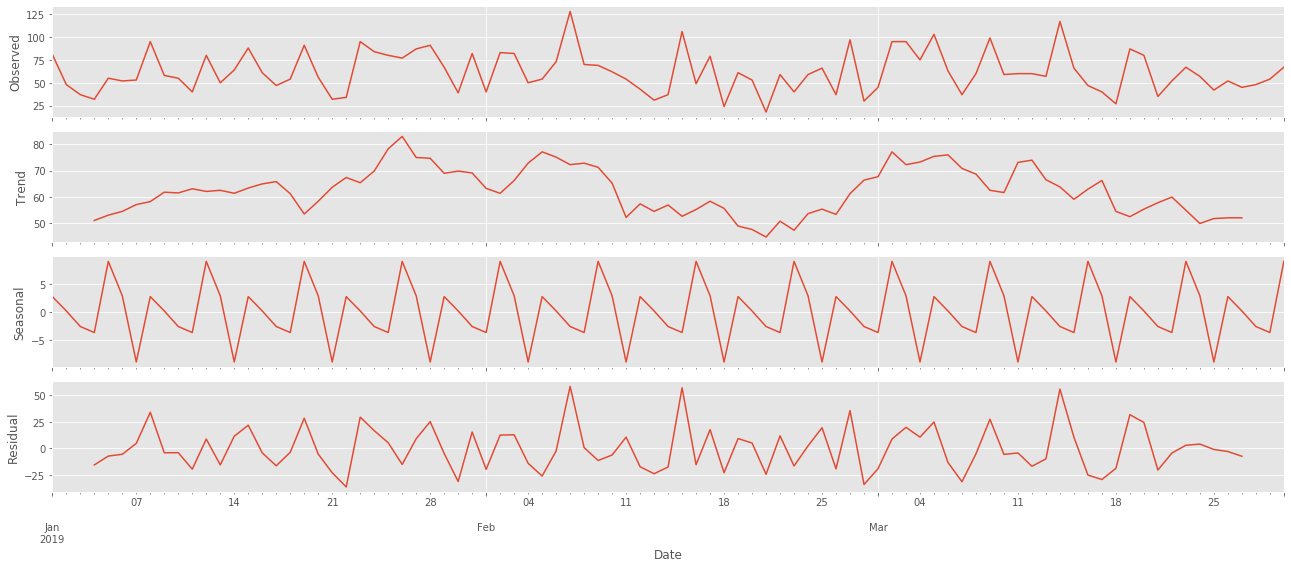

In [0]:
#Decomposition plot for the data
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data1, model='additive')
fig = decomposition.plot()
plt.show()

In [0]:
#Example for parameter combinations of Seasonal ARIMA
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [0]:
#loop to find the Best parameters for SARIMA Analysis
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
             continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:988.0367692111834
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:815.0484533559684
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:748.8045161863683
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:601.3420972994853
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:755.5316460915382
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:719.2976477855198
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:628.6285548906636
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:603.3304719366449
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:918.01648903017
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:767.7952500684823
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:738.5892827563116
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:593.3917522338627
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:752.5275569325415
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:710.665981343199
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:630.1298803887839
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:595.381878738449
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:842.5277260206695
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:731.5470402383783
ARIMA(0, 1, 0)

In [0]:
#Result Summary
mod = sm.tsa.statespace.SARIMAX(data1,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8963      0.078    -11.441      0.000      -1.050      -0.743
ma.S.L12      -1.0000      0.241     -4.154      0.000      -1.472      -0.528
sigma2       566.8298      0.000   1.33e+06      0.000     566.829     566.831


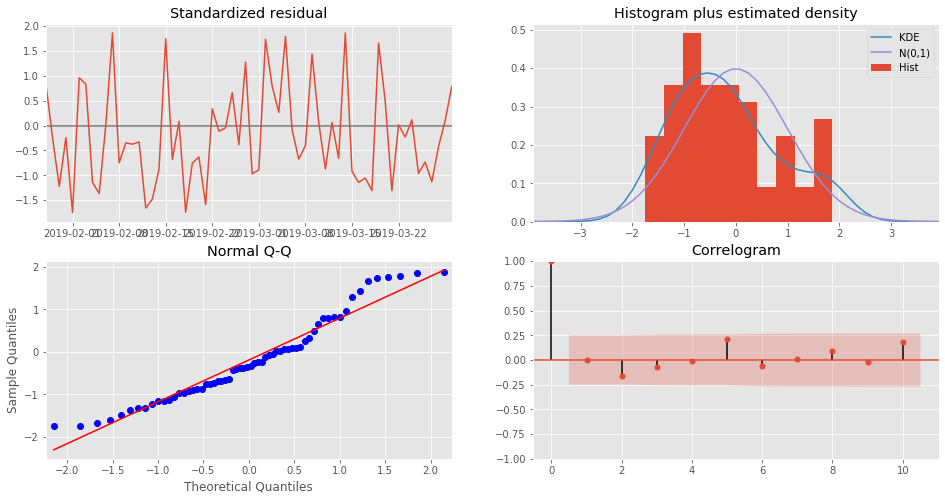

In [0]:
#Plotting the diagnostics for the result
results.plot_diagnostics(figsize=(16, 8))
plt.show()

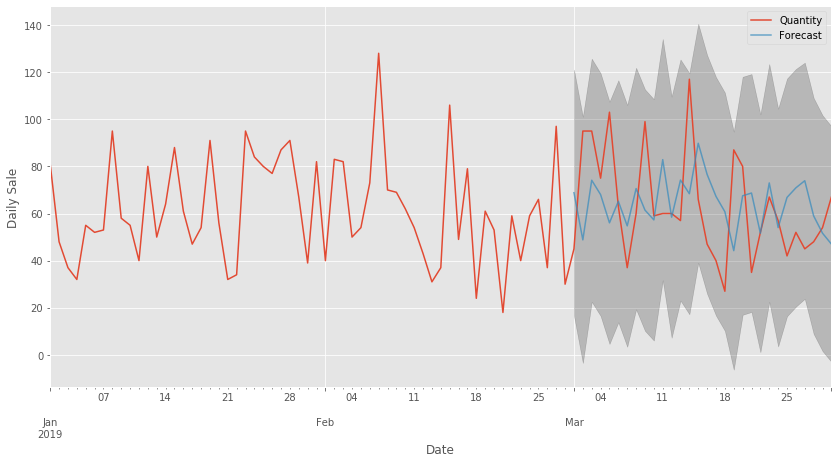

In [0]:
#Plotting the prediction for the month of March
pred = results.get_prediction(start=pd.to_datetime('2019-03-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = data1.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Daily Sale')
plt.legend()
plt.show()


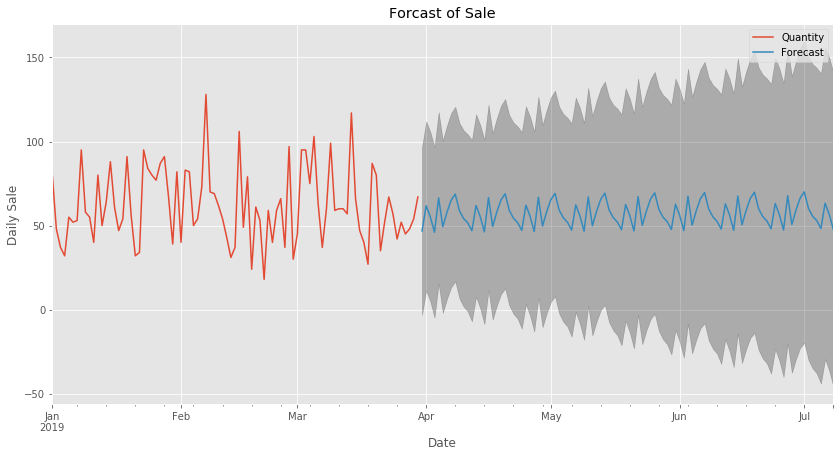

In [0]:
#Predicting Sale for the 4 months based on the dataset
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = data1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Daily Sale')
ax.set_title('Forcast of Sale')
plt.legend()
plt.show()

In [0]:
y_forecasted = pred.predicted_mean
y_forecasted = y_forecasted.to_frame()
y_forecasted = y_forecasted.reset_index()
del y_forecasted['index']
y = y_forecasted.squeeze()

y_truth = data1['2019-03-01':]
y_truth = y_truth.reset_index()
del y_truth["Date"]
s = y_truth.squeeze()
#Mean squared error
mse = ((y - s) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))


The Mean Squared Error of our forecasts is 641.47


In [0]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 25.33


In [0]:
mape = np.mean(np.abs(y - s)/np.abs(y))
print(mape)

0.3331345144576103
